<a href="https://www.kaggle.com/code/hossamrizk/what-is-behind-sklearn?scriptVersionId=149260292" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#581845 ;font-family:newtimeroman;color:white;font-size:300%;text-align:center;border-radius:60px 1px;"> Contents </p> 
    
<ul style = color:#581845;font-size:160%;>
    <li> EDA</li>
    <li> Outliers </li>
    <li> Support vector machine </li>
    <li> Decision tree </li>
    <li> Random forest </li>
    <li> KNN </li>
    <li> Naive bayse </li>
    <li> Comparison </li>
    <li> Outliers </li>
</ul>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#581845;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
EDA
</p>
</div>

In [1]:
import numpy as np
import pandas as pd
import os
from collections import Counter
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.tail(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.shape

(303, 14)

In [7]:
df.isnull().sum().any()

False

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [9]:
fig = px.pie(df , 'sex' , color_discrete_sequence=['#400b30','#800a5d'],title = 'Sex of patience')
fig.show()

In [10]:
px.histogram(df,x='output',color='sex',hover_data=df.columns,barmode='group',color_discrete_sequence=['#400b30','#800a5d'],title='Sex distribuiton')

In [11]:
px.histogram(df,x='cp',color='output',hover_data=df.columns,barmode='group',color_discrete_sequence=['#400b30','#800a5d'],title='chest pain distribuiton')

In [12]:
px.histogram(df,x='thalachh',color='output',hover_data=df.columns,barmode='group',color_discrete_sequence=['#400b30','#800a5d'],title='heart rate distribuiton')

In [13]:
px.histogram(df,x='chol',color='output',hover_data=df.columns,barmode='group',color_discrete_sequence=['#400b30','#800a5d'],title='cholestoral distribuiton')

In [14]:
px.histogram(df,x='fbs',color='output',hover_data=df.columns,barmode='group',color_discrete_sequence=['#400b30','#800a5d'],title='Blood sugar distribuiton')

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#581845;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Outliers
</p>
</div>

In [15]:
px.box(df , x = 'output' , y = 'age' ,color='sex' ,color_discrete_sequence=['#400b30','#800a5d'] ,title = 'Outliers in age')

In [16]:
px.box(df , x = 'output' , y = 'cp' ,color='sex' ,color_discrete_sequence=['#400b30','#800a5d'] ,title = 'Outliers in chest pain')

In [17]:
px.box(df , x = 'output' , y = 'trtbps' ,color='sex' ,color_discrete_sequence=['#400b30','#800a5d'] ,title = 'Outliers in blood presure')

In [18]:
px.box(df , x = 'output' , y = 'chol' ,color='sex' ,color_discrete_sequence=['#400b30','#800a5d'] ,title = 'Outliers in cholestrol')

In [19]:
px.box(df , x = 'output' , y = 'thalachh' ,color='sex' ,color_discrete_sequence=['#400b30','#800a5d'] ,title = 'Outliers in heart rate')

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#581845;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Data Preprocessing
</p>
</div>

In [20]:
corr = df.corr()
corr

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [21]:
colors = [[0.0, '#D7BDE2'],
          [0.1, '#D2B4DE'],
          [0.2, '#BB8FCE'],
          [0.3, '#A569BD'],
          [0.4, '#8E44AD'],
          [0.5, '#7D3C98'],
          [0.6, '#6C3483'],
          [0.7, '#633974'],
          [0.8, '#76448A'],
          [0.9, '#17202A'],
          [1.0, '#4A235A']]

fig = px.imshow(corr, color_continuous_scale=colors,text_auto=True)
fig.update_layout(width=1500, height=1500, 
                  title='Correlation Matrix',)

fig.show()

In [22]:
X=df.iloc[:,:-1] 
y=df.iloc[:,-1]

In [23]:
# Use this for more acc
X = np.array(X)
y = np.array(y)

In [24]:
maximum_value=X.max()
X= X / maximum_value

In [25]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state = 42)

In [26]:
print( 'X_train shape is ',X_train.shape)
print( 'X_valid shape is ',X_valid.shape)
print( 'y_train shape is ',y_train.shape)
print( 'y_valid shape is ',y_valid.shape)

X_train shape is  (242, 13)
X_valid shape is  (61, 13)
y_train shape is  (242,)
y_valid shape is  (61,)


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#581845;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
SVM Model
</p>
</div>

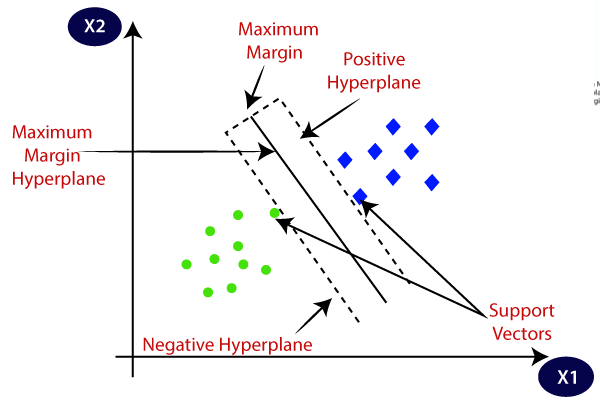

**What is the hyperplane?** Hyper plane is is a decision boundary differentiates the two classes in SVM.A data point falling on either side of the hyperplane can be attributed to different classes. The dimension of the hyperplane depends on the number of input features in the dataset. If we have 2 input features the hyper-plane will be a line. likewise, if the number of features is 3, it will become a two-dimensional plane. 

**What is the margin?** The perpendicular distance between the 2 support vector lines or planes

***Notations:-***

**Hyperplane equation is :**
 
**$$wx - b = 0 \ge 1, at y = 1$$**
**$$wx - b = 0 \le 1, at y = -1,$$**

**In general**

**$$y(wx - b) = 0 \ge 1$$**





**Gradients Equation**
**$$ At y(wx - b) = 0 \ge 1$$**

$$\frac{\partial J}{\partial w}  =[2λw], \frac{\partial J}{\partial b}  =0$$
 


**$$Else$$**

$$\frac{\partial J}{\partial w}  =[2λw - yx], \frac{\partial J}{\partial b}  =y$$

In [27]:
class SVM:
    def __init__(self,lr=0.01,llambda=0.01,epochs=1000):
        self.lr = lr
        self.llambda = llambda
        self.epochs = epochs
        self.w = None
        self.b = None
        
        
    # Define Parameters
    def params(self, X):
        n_samples , n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        
        
    # Gradient Descent
    def gradient_descent(self,X,y):
        y_ = np.where(y <=0 ,-1 , 1) # Make y value -1 if it`s less than or equal 0, otherwise 1
        for i , x in enumerate(X):
            if y_[i] * ( np.dot(self.w,x) - self.b ) >= 1:
                dw = 2 * self.llambda * self.w
                db = 0
                
                
            else:
                dw = 2 * self.llambda * self.w - np.dot(y_[i],x)
                db = y_[i]
                
            self.update(dw , db)
                
                
    def update(self,dw ,db ):
        self.w = self.w - self.lr * dw
        self.b = self.b - self.lr * db
    
    def fit(self, X ,y):
        self.params(X)
        for i in range(self.epochs):
            self.gradient_descent(X,y)
            
    def predict(self,X):
        y_hat = np.dot(self.w , X.T) - self.b
        y_hat_signs = np.sign(y_hat)
        predictions = np.where(y_hat_signs <= -1, 0, 1)
        return predictions

In [28]:
def svm_accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

In [29]:
my_svm = SVM()
my_svm.fit(X_train,y_train)
predictions = my_svm.predict(X_valid)

my_svm_score = svm_accuracy(y_valid, predictions)
my_svm_score

0.5245901639344263

**Sklearn model**

In [30]:
sk_svm=SVC()
sk_svm.fit(X_train,y_train)
sk_predictions = sk_svm.predict(X_valid)

sk_svm_score = accuracy_score(y_valid, sk_predictions)
sk_svm_score

0.7049180327868853

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#581845;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Decision tree calssifier
</p>
</div>

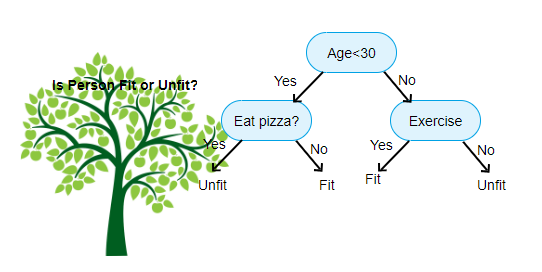

**How It will be done?**

Decision tree consists of some nodes so we will build two classes, one for nodes and one for decision tree itself. We will have two branches one for right side and one for left side.

We will need to define :
* Which feaure do we split the branch with? 
* Which point should we split on?
* When we should stop spliting? (Depth)

**Important terms**

**Information Gain IG**: It is the basic criterion to decide whether a feature should be used for a split node or not. The feature of the highest value of Information gain is used for spliting node. It select the optimal split for a decision tree node.

**Entropy:** Entropy is an information theory metric that measures the impurity or uncertainty in a group of observations. It determines how a decision tree chooses to split data. The image below gives a better description of the purity of a set.

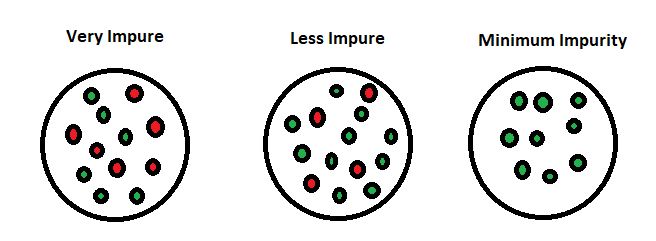

**Notations**

**Entropy equation**
$$H = -\sum\limits_{}^{} p_{i}\text{log}_2 p_{i} 
$$
**Where $(p_1)$ is the fraction of examples that are a certain class**


**Information Gain equation**

**$$H(p_1^\text{node})- (w^{\text{left}}H(p_1^\text{left}) + w^{\text{right}}H(p_1^\text{right}))$$**
**where** 
- $H(p_1^\text{node})$ is entropy at the node 
- $H(p_1^\text{left})$ and $H(p_1^\text{right})$ are the entropies at the left and the right branches resulting from the split
- $w^{\text{left}}$ and $w^{\text{right}}$ are the proportion of examples at the left and right branch respectively


In [31]:
class Node():
    def __init__(self , feature = None , threshold = None , left = None , right = None , value = None):
        self.feature = feature  # Which feature this was divided with 
        self.threshold = threshold  # which threshold this was divied with
        self.left = left # Left tree 
        self.right = right # right tree
        self.value = value # Leaf node
        
    def is_leaf_node(self):
        return self.value is not None

In [32]:
class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        # check the stopping criteria
        # When to stop condition
        # 1. if the depth of sub tree is greater than or equal to the maximum depth of the root
        # 2. if number of samples in node is equal to 1 it means it is a leaf node.So we dont want to split it again
        # 3. if number of samples in node is smalle than the minimum samples number
        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split): # If this happen so i dont to split any more
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)


    def _best_split(self, X, y, feat_idxs): # We are going to find all possible thresholds and all possible splits that are there, what the best one is
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # calculate the information gain
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold


    def _information_gain(self, y, X_column, threshold):
        # parent entropy
        parent_entropy = self._entropy(y)

        # create children
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        
        # calculate the weighted avg. entropy of children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        # calculate the IG
        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten() # which indices will go to the left and which will go to the right
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])


    def _most_common_label(self, y):
        counter = Counter(y) # This will count all values in y and put it in a dictinary the output is: Counter({1: 165, 0: 138})
        value = counter.most_common(1)[0][0] # most_common(1) will retun the first dict which is [(1, 165)], then [0] will retun the tuple in the list (1, 165), then [0] will return 1
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)
    
    
    def accuracy(y_test, y_pred):
        return np.sum(y_valid == y_pred) / len(y_valid)

In [33]:
def tree_accuracy(y_test, y_pred):
        return np.sum(y_valid == y_pred) / len(y_valid)
    
my_tree = DecisionTree()
my_tree.fit(X_train,y_train)
my_tree_predictions = my_tree.predict(X_valid)
my_tree_accuracy = tree_accuracy(y_valid, my_tree_predictions)
my_tree_accuracy

0.819672131147541

**Sklearn model**

In [34]:
sk_tree = DecisionTreeClassifier()
sk_tree.fit(X_train , y_train)
sk_tree_pred = sk_tree.predict(X_valid)
sk_tree_score = accuracy_score(y_valid, sk_tree_pred)
sk_tree_score

0.7704918032786885

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#581845;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Random forest classifier
</p>
</div>

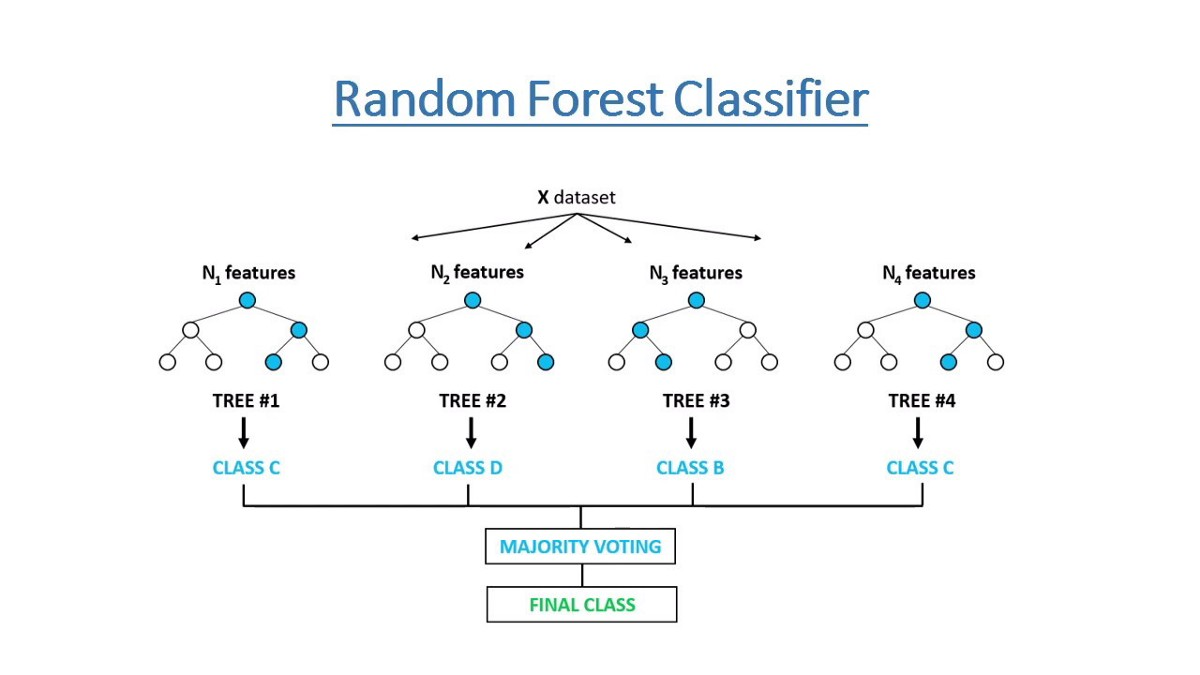

**It consists from lots of trees. So we will use decision tree class that we implement before**

In [35]:
class forest:
    def __init__(self , n_feature = None , n_trees = 10 , max_depth = 10 , min_samples_split = 2):
        self.n_features = n_feature
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.trees = []
        
    def fit(self, X , y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(min_samples_split=self.min_samples_split , max_depth = self.max_depth ,n_features= self.n_features)
            X_sample , y_sample = self.sample_data(X , y)
            tree.fit(X_sample ,y_sample)
            self.trees.append(tree)
            
            
            
    def most_common_label(self , y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common
            
               
            
    def sample_data(self , X ,y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples , n_samples , replace = True)
        return X[idxs] , y[idxs]
            
        
        
        
    def predict(self ,X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        # Now we will have output like [[],[],[]] each list of these include predictions of each sample, predict of first sample, secnd sample and so on.
        # But we need to have [[]] where the inner list contains the predictions of the first sample in the first tree and the first sample of second tree and so on
        tree_preds = np.swapaxes(predictions , 0 ,1)
        predictions = np.array([self.most_common_label(pred) for pred in tree_preds])
        return predictions

In [36]:
def accuracy_forest(y_test, y_pred):
        return np.sum(y_valid == y_pred) / len(y_valid)
    
    
my_forest = forest(n_trees=20)
my_forest.fit(X_train, y_train)
my_forest_predictions = my_forest.predict(X_valid)

my_forest_score =  accuracy_forest(y_valid, my_forest_predictions)
print(my_forest_score)

0.8032786885245902


**Sklearn model**

In [37]:
sk_forest = RandomForestClassifier()
sk_forest.fit(X_train,y_train)
sk_forest_pred = sk_forest.predict(X_valid)
sk_forest_score = accuracy_score(y_valid , sk_forest_pred)
sk_forest_score

0.8524590163934426

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#581845;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
KNN
</p>
</div>

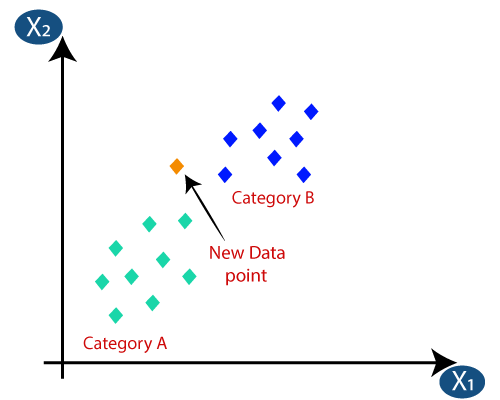

**To classify an unknown instance represented by some feature vectors as a point in the feature space, the k-NN classifier calculates the distances between the point and points in the training data set. Usually, the Euclidean distance is used as the distance metric**

### Euclidean Distance
$$\sqrt{\sum\limits_{i = 0}^{m-1} (x - y)^2}$$

In [38]:
def eclidean_distance(x1 , x2):
    distance = np.sqrt(np.sum(np.square(x1 - x2)))
    return distance

In [39]:
class knn:
    def __init__(self , k = 3):
        self.k = k
        
        
    def fit(self , X , y):
        self.X_train = X
        self.y_train = y
        
        
        
    def predict(self , X):
        predictions = [self._predict(x) for x in X] # for each of the examples in the data set that is being sent to us
        return predictions
        
    # Helper function to get a single data point     
    def _predict(self , x): # x is a single data point
        # compute distance for a single data point
        distances = [eclidean_distance(x , x_train) for x_train in self.X_train]
        
        # get the closest k
        k_indices = np.argsort(distances)[:self.k] # tells us where are the original indiceis from the array distances would be after they are sorted
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # majority vote
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

In [40]:
my_knn = knn()
my_knn.fit(X_train , y_train)
my_knn_predict = my_knn.predict(X_valid)
my_knn_score = np.sum(my_knn_predict == y_valid) / len(y_valid)
print(my_knn_score)

0.6557377049180327


**sklearn model**

In [41]:
sk_knn = KNeighborsClassifier()
sk_knn.fit(X_train , y_train)
sk_knn_predict = sk_knn.predict(X_valid)
sk_knn_acc = accuracy_score(y_valid , sk_knn_predict)
print(sk_knn_acc)

0.6885245901639344


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#581845;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Naive Bayse
</p>
</div>

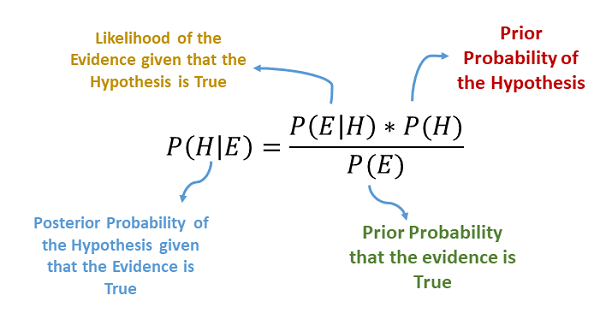

**A Naive Bayes classifier is a probabilistic machine learning model that’s used for classification task. The crux of the classifier is based on the Bayes theorem.**

**bayes theorm**

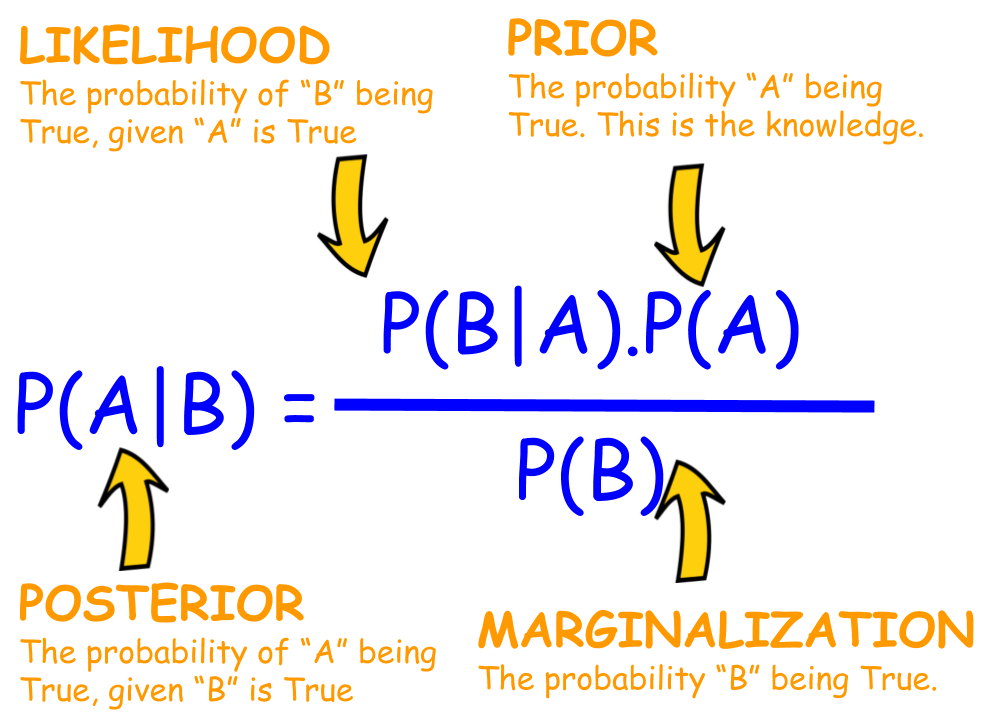

**To build naive bayse we will calculate mean, variance and prior where prior is the number of elemnts in a certain class / number of elemnts of all classes**

**The poeistor equation is $log{P(x_1 | y)}$ + $log{P(x_2 | y)}$ + $log{P(x_3 | y)}$ .. + $log{P(x_n | y)}$**

**And to avoid getting to small number we will use np.argmax**

**np.argmax[(the posterior) + $log{P(P_y)}$**]

In [42]:
class naive():
    
    def fit(self , X ,y):
        n_samples , n_features = X.shape
        self.unique_classes = np.unique(y)
        n_classes = len(self.unique_classes)
        
        # compute mean, variance and prior for each class
        self._mean = np.zeros((n_classes , n_features))
        self._var = np.zeros((n_classes , n_features))
        self._priors = np.zeros(n_classes ) # for each class we want a prior
        
        for idx , c in enumerate(self.unique_classes): # for indx and class in enumerate _classes
            X_c = X[y == c] # only get the samples of this class
            self._mean[idx,:] = X_c.mean(axis=0) # get the mean of current indx and then for all features 
            self._var[idx,:] = X_c.var(axis=0) # get the variance of current indx and then for all features 
            self._priors[idx] = X_c.shape[0] / float(n_samples) # Number of samples divided by all the total samples
            
    

    def predict(self, X):
        y_pred = [self._predict(x) for x in X] # x is one sample
        return np.array(y_pred)
    
    # calculate poestrior 
    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self.unique_classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = posterior + prior
            posteriors.append(posterior)

        # return class with the highest posterior
        return self.unique_classes[np.argmax(posteriors)]
    
    # probability density 
    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator
        

In [43]:
def naive_acc(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

In [44]:
my_naive = naive()
my_naive.fit(X_train , y_train)
my_naive_pred = my_naive.predict(X_valid)
my_naive_score = naive_acc(y_valid , my_naive_pred)
my_naive_score

0.8688524590163934

**sklearn model**

In [45]:
sk_naive = GaussianNB()
sk_naive.fit(X_train , y_train)
sk_naive_pred = sk_naive.predict(X_valid)
sk_naive_score = accuracy_score(y_valid , sk_naive_pred)
sk_naive_score

0.8688524590163934

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#581845;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Comparison
</p>
</div>

In [46]:
my_models=pd.DataFrame({'My_model' :['SVM','Decision tree','Random forest','KNN', 'Naive bayes'],'My_score' :[my_svm_score,my_tree_accuracy,my_forest_score,my_knn_score,my_naive_score]})
my_models.sort_values(by='My_score',ascending=False)

,My_model,My_score
4,Naive bayes,0.868852
1,Decision tree,0.819672
2,Random forest,0.803279
3,KNN,0.655738
0,SVM,0.524590


In [47]:
sk_models=pd.DataFrame({'Sk_model' :['SVM','Decision tree','Random forest','KNN', 'Naive bayes'],'Sk_score' :[sk_svm_score,sk_tree_score,sk_forest_score,sk_knn_acc,sk_naive_score]})
sk_models.sort_values(by='Sk_score',ascending=False)

,Sk_model,Sk_score
4,Naive bayes,0.868852
2,Random forest,0.852459
1,Decision tree,0.770492
0,SVM,0.704918
3,KNN,0.688525


In [48]:
all_models = pd.merge(my_models, sk_models, left_on='My_model', right_on='Sk_model')
all_models

,My_model,My_score,Sk_model,Sk_score
0,SVM,0.524590,SVM,0.704918
1,Decision tree,0.819672,Decision tree,0.770492
2,Random forest,0.803279,Random forest,0.852459
3,KNN,0.655738,KNN,0.688525
4,Naive bayes,0.868852,Naive bayes,0.868852


In [49]:
fig = make_subplots(rows=1, cols=2,subplot_titles=("My_models", "Sk_models"))

fig.add_trace(
    go.Scatter(x=['My_SVM','My_Decision tree','My_Random forest','My_KNN', 'My_Naive bayes'], y=[0.524590, 0.819672, 0.836066,0.655738,0.868852]),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=['Sk_SVM','Sk_Decision tree','Sk_Random forest','Sk_KNN', 'Sk_Naive bayes'], y=[0.704918, 0.836066, 0.868852, 0.688525, 0.868852]),
    row=1, col=2
)

fig.update_layout(height=600, width=800, title_text="comparison")
fig.show()

In [50]:
fig = make_subplots(rows=1, cols=2,subplot_titles=("My_models", "Sk_models"))

fig.add_trace(go.Bar(x=['My_SVM','My_Decision tree','My_Random forest','My_KNN', 'My_Naive bayes'], y=[0.524590, 0.819672, 0.836066,0.655738,0.868852],
                    marker=dict(color=[4, 5, 6], coloraxis="coloraxis")),
              1, 1)
fig.add_trace(go.Bar(x=['Sk_SVM','Sk_Decision tree','Sk_Random forest','Sk_KNN', 'Sk_Naive bayes'], y=[0.704918, 0.836066, 0.868852, 0.688525, 0.868852],
                    marker=dict(color=[2, 3, 5], coloraxis="coloraxis")),
              1, 2)

fig.update_layout(height=600, width=800, title_text="comparison",coloraxis=dict(colorscale='Bluered_r'), showlegend=False)
fig.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#581845;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Thanks
</p>
</div>

**Thank you for reading the whole notebook.**

**I hope you like it, If you found it useful please upvote**